# Домашнее задание №2
**Постановка задачи**

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
- Рассчитать объемы вводимого жилья по регионам и по годам.
- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
- Визуализировать разброс, связь и распределение этих показателей по регионам
- Сделать выводы по каждому из расчетов и графиков

## Подготовительные действия

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [31]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Получение данных

In [3]:
# загрузим данные из pickl-а, полученного в предыдущем ДЗ
data = pd.read_pickle('full_data.pickle')

## Предобработка данных

In [4]:
# выведем первые 10 строк датафрейма
display(data.head(10))

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,generalContractorNm,airQualityIndexValue,transportDistIndex,transportDistIndexValue,greenAreaIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,45592,543495,64,"г Энгельс, ул Трудовая, д. 12, строение 1Г","ЖК ""Рио"" д.1Г",25.0,25.0,154,2024-09-30,Монолит-кирпич,Без отделки,Есть,194,9169.38,64-000425,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,03-08-2022 14:57,51.5,46.0963,0,0,Типовой,17-08-2022 01:24,"[{'objId': 45592, 'pdId': 543495, 'rpdId': 621...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,126219,25.0,154,9169.38,2,0,True,31-03-2025 12:00,"2,7",0,1.0,1.0,1.0,194.0,50.0,1,1,0.0,3.0,0.0,0.004245,119989.0,1.0,[],True,market@shaldom.ru,1,A,7,1923,СЗ ШЭЛДОМ,СЗ ШЭЛДОМ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ШЭЛДОМ,0,9,8,Саратовская область,+7(845)227-55-66,www.shaldom.ru,law@shaldom.ru,6453009098,1026403041345,645301001,"Саратовская область, город Саратов, тупик Дело...","обл Саратовская, г Саратов, ул Киселева д. 64/66",621383.0,0,64.0,Шамхалов Байтемир Шамхалович,Шэлдом,1,Акционерное общество,АО,7283.0,1,0,66.0,66.0,22.0,0.0,154.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.0,13.0,99,2022-12-31,Монолит-кирпич,Без отделки,Нет,0,4226.31,16-000908,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,05-08-2022 14:46,55.7546,52.4556,0,0,Комфорт,17-08-2022 01:24,"[{'objId': 32787, 'pdId': 181636, 'rpdId': 621...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,43579,13.0,99,4226.31,3,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,89.0,282.0,1,1,0.0,1.0,1.0,0.903940,61133.0,1.0,[],True,tatkamstroy@mail.ru,1,A,8,6946,СЗТКС,СЗТКС,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИКТАТКАМСТРОЙ,0,2,4,Татарстан Республика,+7(855)544-03-74,www.таткамстрой.рф,tatkamstroy@mail.ru,1650173193,1081650004281,165001001,"Татарстан Республика, город Набережные Челны, ...",Респ Татарстан г Набережные Челны пр-кт Автоза...,621992.0,0,16.0,Мусин Тагир Максимович,ТАТКАМСТРОЙ,4,Общество с ограниченной ответственност

In [5]:
# выведем информацию о столбцах и типах данных, а также использовании RAM
data.info(memory_usage='deep', verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    id                                         10534 non-null  int64  
 1    pdId                                       10534 non-null  int64  
 2    region                                     10534 non-null  int64  
 3    address                                    10508 non-null  object 
 4    nameObj                                    8139 non-null   object 
 5    floorMin                                   10531 non-null  float64
 6    floorMax                                   10533 non-null  float64
 7    objElemLivingCnt                           10534 non-null  int64  
 8    objReady100PercDt                          10534 non-null  object 
 9    wallMaterialShortDesc                      10534 non-null  object 
 10   objLkFin

Для решения задачи все 107 столбцов нам не нужны. Оставим следующие:


|:--------:|:-------------------:|
|Данные|Идентификатор столбца|
|Идентификатор объекта|id|
|Идентификатор региона|region|
|Средняя цена м2|objPriceAvg|
|Год ввода в эксплуцатацию|objReady100PercDt|
|Жилая площадь м2|objFlatSq|
|Кол-во этажей|objFloorCnt|
|Кол-во квартир|objFlatCnt|
|Кол-во парковочных мест|objElemParkingCnt, objInfrstrObjPrkngCnt, objInfrstrNotObjPrkngCnt|

Для расчёта парковочных мест будем брать сумму всех трёх показателей - количество мест в паркинге, количество гостевых мест на придомовой территории
и количество гостевых мест вне придомовой территории

In [6]:
filtered_data = data[
    [
        'id',
        'region',
        'objPriceAvg',
        'objReady100PercDt',
        'objFlatSq',
        'objFloorCnt',
        'objFlatCnt',
        'objElemParkingCnt',
        'objInfrstrObjPrkngCnt',
        'objInfrstrNotObjPrkngCnt'
    ]
].copy()

In [7]:
# выведем информацию о столбцах и типах данных, а также использовании RAM после фильтрации столбцов
display(
    filtered_data.info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10534 non-null  int64  
 1   region                    10534 non-null  int64  
 2   objPriceAvg               7608 non-null   float64
 3   objReady100PercDt         10534 non-null  object 
 4   objFlatSq                 10534 non-null  object 
 5   objFloorCnt               10533 non-null  float64
 6   objFlatCnt                10534 non-null  int64  
 7   objElemParkingCnt         10534 non-null  int64  
 8   objInfrstrObjPrkngCnt     10451 non-null  float64
 9   objInfrstrNotObjPrkngCnt  10444 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0 MB


None

In [8]:
display(filtered_data.head(10).T)

,0,1,2,3,4,5,6,7,8,9
id,45592,32787,32793,32849,32873,32892,32893,32894,32895,32897
region,64,16,50,37,42,50,50,50,64,77
objPriceAvg,119989.0,61133.0,151912.0,50138.0,63800.0,156122.0,148909.0,143856.0,NaN,291333.0
objReady100PercDt,2024-09-30,2022-12-31,2023-03-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-06-30,2023-06-30
objFlatSq,9169.38,4226.31,27631.0,8770.6,9716.0,1540.0,1540.0,1540.0,2141.6,78724.3
objFloorCnt,25.0,13.0,13.0,8.0,14.0,3.0,3.0,3.0,11.0,27.0
objFlatCnt,154,99,545,183,189,22,22,22,43,1314
objElemParkingCnt,194,0,264,0,0,0,0,0,0,691
objInfrstrObjPrkngCnt,194.0,89.0,139.0,10.0,35.0,15.0,15.0,15.0,0.0,0.0
objInfrstrNotObjPrkngCnt,50.0,282.0,0.0,10.0,0.0,0.0,0.0,0.0,30.0,213.0


## Приведение типов и предобработка

Составим план действий по предобработке данных


|:-:|:-:|:-:|:-:|
|Столбец|Число значений non-null|Тип данных|Что нужно сделать?|
|id|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|region|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objPriceAvg|7608|`float64`|Null-значения есть, в значительном объёме; для экономии памяти мы можем заменить их 0-ми значениями и не учитывать при расчётах в дальнейшем; после этого сделать downcast к типу `float`|
|objReady100PercDt|10534|`object`|Null-значений нет, достаточно просто привести данные к типу `datetime64`|
|objFlatSq|10534|`object`|Null-значений нет, достаточно просто сделать downcast к типу `float`|
|objFloorCnt|10533|`float64`|1 Null-значение; изучим этот объект подробнее для принятия решения|
|objFlatCnt|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objElemParkingCnt|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objInfrstrObjPrkngCnt|10451|`float64`|Null-значения присутствуют, их можно смело заменить на 0; после этого необходимо сделать downcast к типу `unsigned int`|
|objInfrstrNotObjPrkngCnt|10444|`float64`|Null-значения присутствуют, их можно смело заменить на 0; после этого необходимо сделать downcast к типу `unsigned int`|

In [9]:
# изучим объект с неизвестным числом этажей
display(data[data.objFloorCnt.isna()].T)

,10112
id,29679
pdId,124647
region,61
address,г Таганрог
nameObj,NaN
floorMin,NaN
floorMax,NaN
objElemLivingCnt,18
objReady100PercDt,2020-03-31
wallMaterialShortDesc,Другое


Анализ имеющейся информации, проектной документации и открытых источников (сайт застроищика, портал 2gis.ru) даёт нам информацию о том, что в данном доме 3 этажа. Т.е. для столбца `objFloorCnt` заполняем null-values цифрой 3

In [10]:
# заполним null-values
filtered_data.fillna(
    value={
        'objPriceAvg': 0,
        'objFloorCnt': 3,
        'objInfrstrObjPrkngCnt': 0,
        'objInfrstrNotObjPrkngCnt': 0
    },
    inplace=True
)

In [11]:
filtered_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10534 non-null  int64  
 1   region                    10534 non-null  int64  
 2   objPriceAvg               10534 non-null  float64
 3   objReady100PercDt         10534 non-null  object 
 4   objFlatSq                 10534 non-null  object 
 5   objFloorCnt               10534 non-null  float64
 6   objFlatCnt                10534 non-null  int64  
 7   objElemParkingCnt         10534 non-null  int64  
 8   objInfrstrObjPrkngCnt     10534 non-null  float64
 9   objInfrstrNotObjPrkngCnt  10534 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0 MB


In [12]:
types_dict = {
    'id': 'unsigned',
    'region': 'unsigned',
    'objPriceAvg': 'float',
    'objReady100PercDt': 'datetime64',
    'objFlatSq': 'float',
    'objFloorCnt': 'unsigned',
    'objFlatCnt': 'unsigned',
    'objElemParkingCnt': 'unsigned',
    'objInfrstrObjPrkngCnt': 'unsigned',
    'objInfrstrNotObjPrkngCnt': 'unsigned'
}

In [13]:
for cl in filtered_data.columns:
    try:
        if cl != 'objReady100PercDt':
            filtered_data[cl] = pd.to_numeric(filtered_data[cl], downcast=types_dict[cl])
        else:
            filtered_data[cl] = pd.to_datetime(filtered_data[cl])
    except ValueError:
        print(f'Произошла ошибка при приведении столбца {cl} к типу {types_dict[cl]}, проверь данные')

In [14]:
display(filtered_data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10534 non-null  uint16        
 1   region                    10534 non-null  uint8         
 2   objPriceAvg               10534 non-null  float32       
 3   objReady100PercDt         10534 non-null  datetime64[ns]
 4   objFlatSq                 10534 non-null  float32       
 5   objFloorCnt               10534 non-null  uint8         
 6   objFlatCnt                10534 non-null  uint16        
 7   objElemParkingCnt         10534 non-null  uint16        
 8   objInfrstrObjPrkngCnt     10534 non-null  uint16        
 9   objInfrstrNotObjPrkngCnt  10534 non-null  uint16        
dtypes: datetime64[ns](1), float32(2), uint16(5), uint8(2)
memory usage: 288.2 KB


None

После приведения данных к рациональным типам и заполнения пропусков мы получили полноценный датафрейм для дальнейшего анализа. За счёт оптимизации типов удалось существенно сократить потребление памяти - с 2 Мб до 288,2 Кб, что в процентном отношении составляет почти 86%. Перейдём непосредственно к исследованию

In [15]:
filtered_data = filtered_data.sort_values(by='id').reset_index(drop=True)

## Исследовательская часть

### Рассчитаем средние цены за квадратный метр по регионам

Так как пропуски значений средней цены мы заполнили нулями, при расчёте средних цен по регионам отфильтруем эти значения

In [16]:
avg_price_per_reg = filtered_data.query('objPriceAvg > 0').groupby('region', as_index=False).agg({'objPriceAvg': 'mean'}).sort_values(by='objPriceAvg', ascending=False).reset_index(drop=True)

In [17]:
# выведем нашу таблицу
display(avg_price_per_reg)

,region,objPriceAvg
0,77,308996.593750
1,78,166111.281250
2,65,137465.093750
3,50,120392.976562
4,25,117392.296875
5,47,116573.523438
6,28,112156.726562
7,16,111629.140625
8,23,111468.796875
9,14,110299.640625


In [27]:
# посмотрим на её основные показатели
avg_price_per_reg.objPriceAvg.describe()

count        79.000000
mean      78238.351562
std       35991.910156
min       20442.000000
25%       59846.027344
50%       70174.789062
75%       88206.527344
max      308996.593750
Name: objPriceAvg, dtype: float64

Из приведённых таблицы видно, что самая высокая стоимость жилья - в г. Москва, причём отрыв от ближайшего преследователя (Санкт-Петербург и Ленинградская область) - в 1,86 раза. На третьем месте - Сахалинская область, где стоимость жилья отличается от СПб и Ленобласти всего в 1,2 раза. Самая низкая стоимость жилья в Мурманской области, при этом относительная разница - 15 (!) раз.

### Рассчитаем объемы вводимого жилья по регионам и по годам

In [28]:
# выделим год из даты ввода объекта в эксплуатацию
filtered_data['year'] = filtered_data.objReady100PercDt.dt.year

In [35]:
# создадим сводную таблицу
sq_per_reg_and_year = filtered_data.pivot_table(
    index='region',
    columns='year',
    values='objFlatSq',
    aggfunc='sum',
    dropna=True,
    fill_value=0,
    margins=True,
    margins_name='Total'
)

In [40]:
# выведем сводную таблицу на экран
display(sq_per_reg_and_year.sort_values(by='Total', ascending=False).drop('Total'))

year,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2036,2038,2039,Total
region,,,,,,,,,,,,,,,,,,,,,,
77,0.00000,0.00000,0,0.00000,0.00000,3583066.50000,5002512.00000,5232856.50000,2720113.75000,356947.37500,101779.89844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,16997276.00000
78,0.00000,0.00000,0,0.00000,0.00000,1991142.75000,3076596.00000,2061856.87500,1512514.75000,223592.93750,20483.42969,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,8886187.00000
50,24389.40039,0.00000,0,7608.64014,66896.45312,2416344.25000,3816636.75000,1910481.87500,539799.75000,35991.37891,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,8818148.00000
23,2033.00000,0.00000,0,0.00000,3604.12012,1341287.25000,2355735.75000,2215476.50000,1166989.25000,1102208.12500,48463.39844,70320.29688,58073.96094,24533.53906,70469.39062,0.00000,0.00000,0.00000,0.00000,0.00000,0,8459195.00000
66,0.00000,0.00000,0,0.00000,21045.00977,744928.37500,1686922.12500,908575.06250,205940.40625,32844.12109,0.00000,12594.40039,7661.33984,0.00000,0.00000,7661.33984,0.00000,5843.91992,11203.20020,8765.87988,0,3653985.25000
47,0.00000,0.00000,0,29051.19922,0.00000,513478.34375,1275765.25000,1114196.00000,216767.06250,91357.17188,8978.71973,0.00000,0.00000,0.00000,47560.70703,0.00000,0.00000,0.00000,0.00000,0.00000,0,3297154.50000
54,0.00000,0.00000,0,47750.30859,43575.69922,640993.68750,1323283.00000,671898.75000,268029.34375,168916.23438,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,3164447.00000
2,0.00000,0.00000,0,1319.45996,2193.04004,571461.25000,742698.56250,896222.25000,349797.53125,157739.73438,170364.68750,40234.26172,32743.72070,32497.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,2997271.75000
61,0.00000,0.00000,0,1519.00000,4777.50000,459721.84375,943060.43750,469009.53125,547348.68750,101913.35156,206794.78125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,2734145.25000


In [53]:
filtered_data.groupby(['region', 'year'], as_index=False).agg({'objFlatSq': 'sum'})

,region,year,objFlatSq
0,1,2022,27256.44922
1,1,2023,99805.92969
2,1,2024,31865.08008
3,1,2025,15927.29980
4,2,2020,1319.45996
5,2,2021,2193.04004
6,2,2022,571461.25000
7,2,2023,742698.56250
8,2,2024,896222.25000
9,2,2025,349797.53125


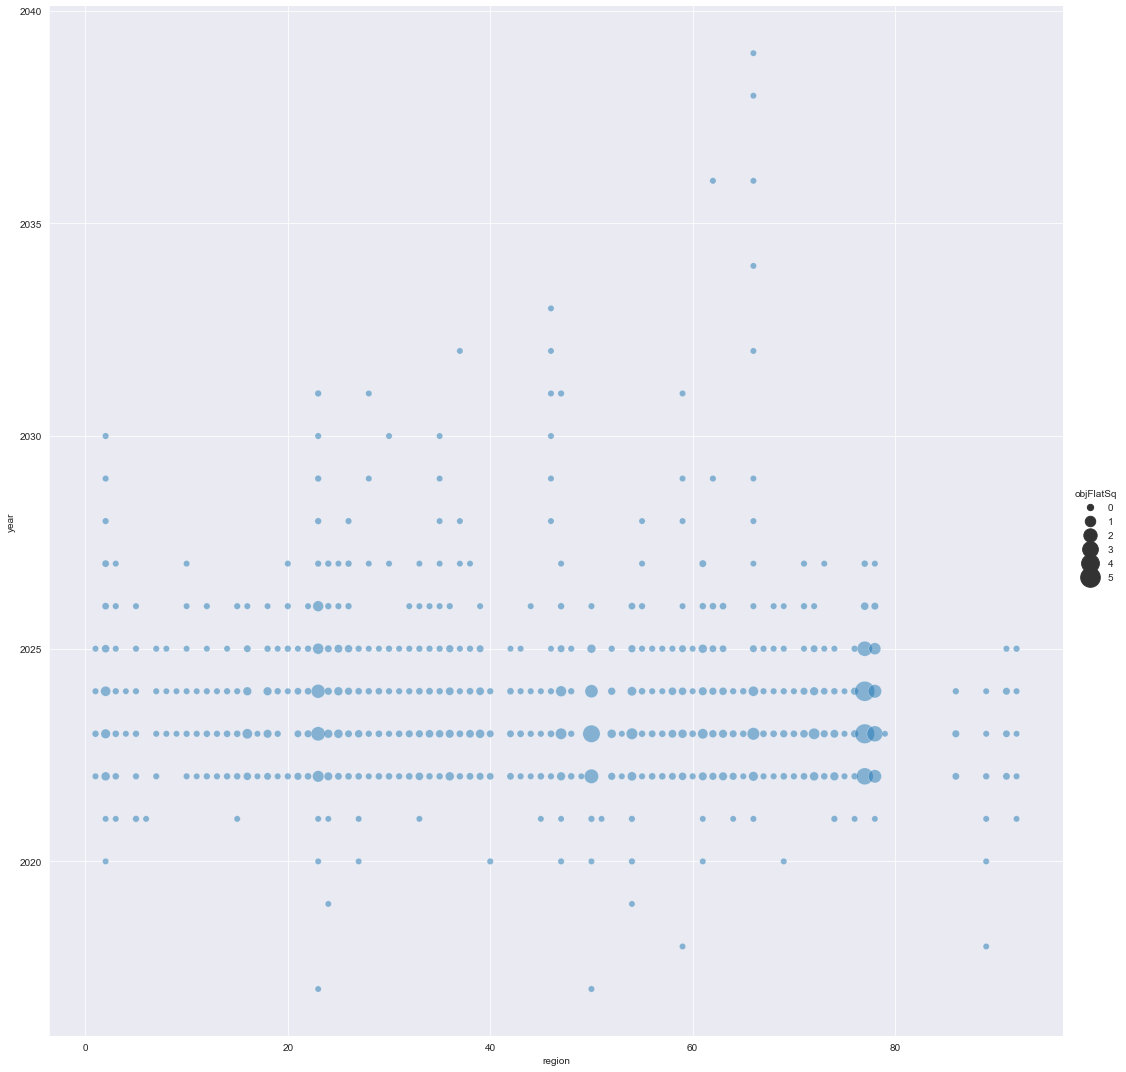

In [52]:
# f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.relplot(
    x="region",
    y="year",
    # hue="origin",
    size="objFlatSq",
    sizes=(40, 400),
    alpha=.5,
    palette="muted",
    height=15,
    data=filtered_data.groupby(['region', 'year'], as_index=False).agg({'objFlatSq': 'sum'})
)
# ax.set(ylabel='Кол-во этажей', xlabel='Регион РФ')
plt.show()

Из полученной таблицы можно увидеть следующее:
1. Данные по объектам на сайте неполные - слабо верится, что в 2017, 2018 и 2019 годах в большинстве регионов не было введено в строй ни одного м²
2. Лидер по вводу недвижимости как в динамике, так и суммарно за имеющийся период - г. Москва
3. На втором месте - опять СПб и Ленобласть, причём относительная разница по суммарной площади (1,91) практически совпадает с разницей в средней стоимости м² (1,86)
4. Очень близко к показателям СПб на 3 и 4 местах соответственно находятся Московская область и Краснодарский край
5. Уже с 5 строчки нашего рейтинга мы опять наблюдаем резкое падение по суммарной введённой площади (более чем в 2 раза)
6. Антилидер данного рейтинга также совпадает с таковым у рейтинга средней стоимости м² - это Мурманская область. Но здесь относительный отрыв от лидера просто ужасающий - за весь имеющийся период в строй введено всего 865 м², это в 19648 (!) раз меньше, чем в Москве. Основываясь только на наших данных мы не можем однозначно утверждать, связан ли этот феномен с экономической ситуацией в Мурманской области, или же у нас просто неполные данные

### Сравним этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах

#### Этажность домов

Для подобного сравнения хорошо подойдёт график типа "ящик с усами"

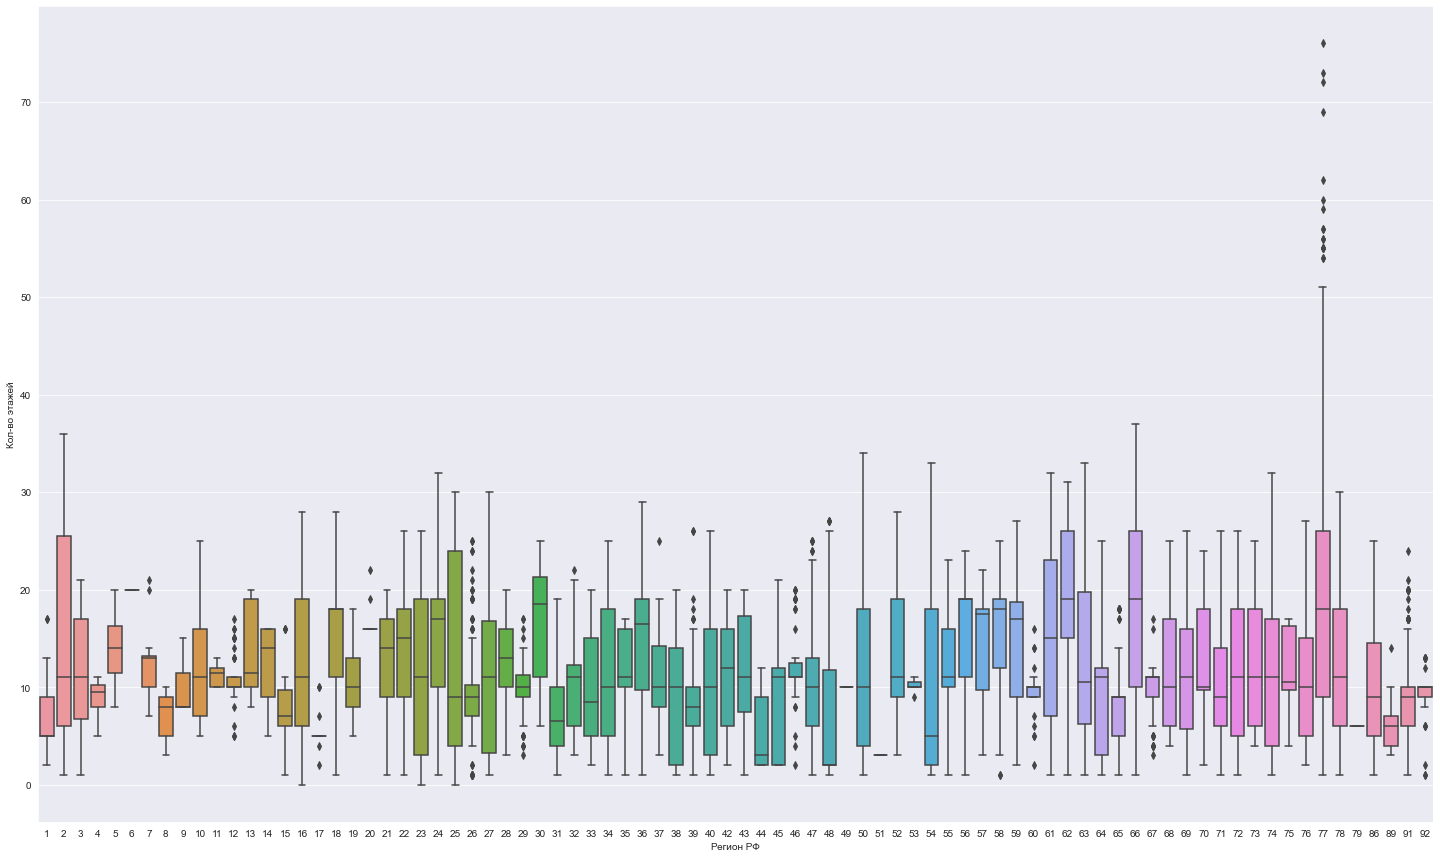

In [47]:
f, ax = plt.subplots(figsize=(25, 15))
sns.set_color_codes("pastel")
sns.boxplot(
    x="region",
    y="objFloorCnt",
    # palette=["m", "g"],
    data=filtered_data
)
ax.set(ylabel='Кол-во этажей', xlabel='Регион РФ')
plt.show()

In [48]:
filtered_data['total_prk'] = filtered_data['objElemParkingCnt'] + filtered_data['objInfrstrObjPrkngCnt'] + filtered_data['objInfrstrNotObjPrkngCnt']

In [49]:
filtered_data.columns

Index(['id', 'region', 'objPriceAvg', 'objReady100PercDt', 'objFlatSq',
       'objFloorCnt', 'objFlatCnt', 'objElemParkingCnt',
       'objInfrstrObjPrkngCnt', 'objInfrstrNotObjPrkngCnt', 'year',
       'total_prk'],
      dtype='object')

In [50]:
filtered_data.groupby('region').agg(
    {
        'objFloorCnt': 'median',
        'objFlatCnt': 'median',
        'objFlatSq': 'median',
        'total_prk': 'median',
        'objPriceAvg': 'median',
    }
)

,objFloorCnt,objFlatCnt,objFlatSq,total_prk,objPriceAvg
region,,,,,
1,5.00000,85.00000,3003.27490,179.00000,67330.00000
2,11.00000,173.00000,8558.67969,28.00000,54046.00000
3,11.00000,107.00000,5363.00000,32.00000,41704.50000
4,9.50000,62.50000,3080.06494,37.50000,70278.50000
5,14.00000,165.00000,11518.73438,33.50000,19824.00000
6,20.00000,170.00000,14557.09961,10.00000,0.00000
7,13.00000,111.00000,11067.27539,80.00000,37411.50000
8,8.00000,59.00000,4100.89990,56.00000,48292.00000
9,8.00000,56.00000,3596.89990,50.00000,0.00000


In [ ]:
sns.set_theme(style='whitegrid')

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
sns.barplot(
    y='region',
    x='objPriceAvg',
    data=avg_price_per_reg,
    color='b',
    orient='h'
)
ax.set(xlim=(0, 350000), ylabel='Регион РФ', xlabel='Средняя стоимость м² жилья, ₽')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
sns.histplot(
    avg_price_per_reg,
    x='objPriceAvg',
    binwidth=50000,
    binrange=(0, 350000)
)
ax.set(ylabel='Кол-во регионов РФ', xlabel='Средняя стоимость м² жилья, ₽')
plt.show()

In [ ]:
sq_per_reg_and_year = filtered_data.groupby(['region', 'objReady100PercDt'], as_index=False).agg({'objFlatSq':'sum'})

In [ ]:
sns.catplot(
    data=sq_per_reg_and_year, kind="bar",
    x="region", y="objFlatSq", hue="objReady100PercDt",
    ci="sd", palette="dark", alpha=.6, height=15, aspect=2
)
sns.despine(left=True)
# ax.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

## Займёмся анализом